## _Importing the necessary libraries & Loading the Dataset_

In [45]:
# Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

# Define the file path for the dataset
file = "C:/Users/lenyo/Documents/visual studiio/Personal projects/Github projects/to my github/Data Analysis/End-to-end projects/Churn Analysis/Prediction_Data.xlsx"

# Define the sheet name to read data from
sheet_name = "churn_data_view"

# Read the data from the specified sheet into a pandas dataframe
data = pd.read_excel(file, sheet_name = sheet_name)

# Display the first few rows of the fetched data
data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_In_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,19877-DEL,Male,35,No,Delhi,7,27,NaN,Yes,No,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,Others,Others
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,NaN,Yes,Yes,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,Others,Others
2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,80,No,Tamil Nadu,3,8,NaN,Yes,No,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


## _Data Processing_

In [46]:
# Removing unimportant columns
data = data.drop(columns=['Customer_ID','Churn_Category','Churn_Reason'], errors = 'ignore')

# List of all columns to label encoded
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method','Customer_Status'
]

# Encoding categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Split data into features and target
x = data.drop('Customer_Status', axis=1)
y = data['Customer_Status'] # Stayed = 1 and churned = 0

# Split the data into train and test data
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size =0.2, random_state = 42)

## _Training the Random Forest model_

In [47]:
# Defining the model
rc_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
rc_model.fit(x_train,y_train)


RandomForestClassifier(random_state=42)

## _Evaluating the Model_

Confusion Matrix:
[[239 122]
 [ 54 787]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.66      0.73       361
           1       0.87      0.94      0.90       841

    accuracy                           0.85      1202
   macro avg       0.84      0.80      0.82      1202
weighted avg       0.85      0.85      0.85      1202



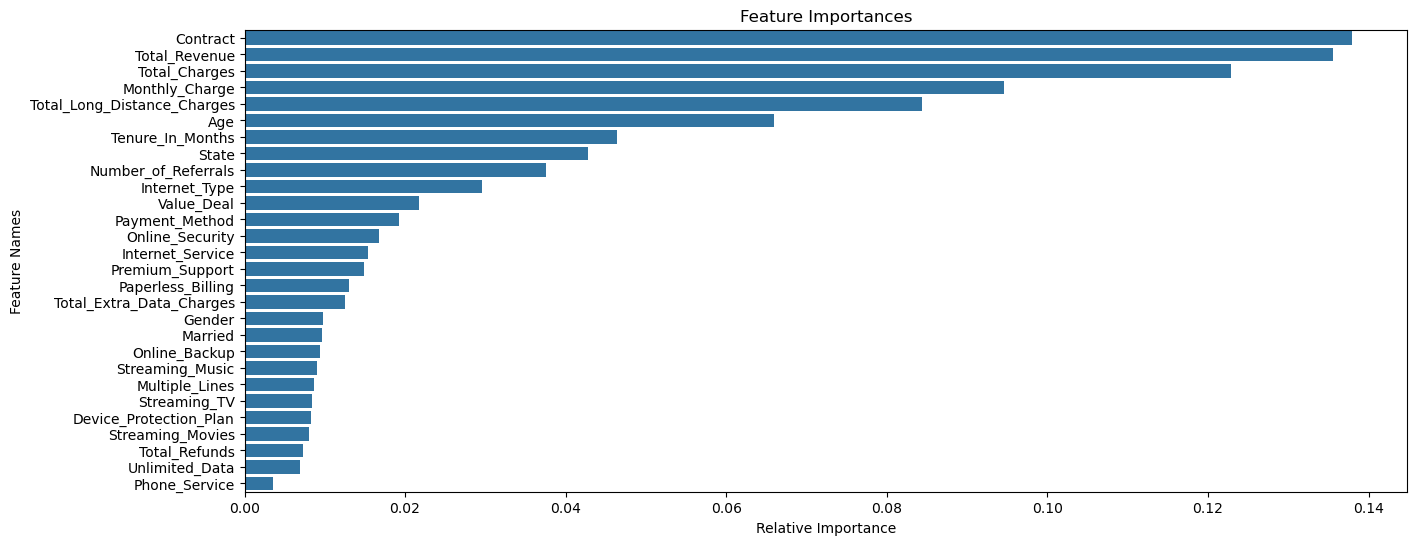

In [50]:
# Making the prediction
y_pred = rc_model.predict(x_test)

# Evaluating the performance
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("\nClassification Report:")
print(classification_report(y_test,y_pred))

# Feature Selection using Feature Importance
importances = rc_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plotting the feature importances
plt.figure(figsize=(15,6))
sns.barplot(x=importances[indices], y=x.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

# Predicting on New Data

In [66]:
# Define the path to the data
file = "C:/Users/lenyo/Documents/visual studiio/Personal projects/Github projects/to my github/Data Analysis/End-to-end projects/Churn Analysis/Prediction_Data.xlsx"

# Define the sheet name to read data from
sheet_name = 'join_data_view'

# Reading data from the specified sheet into a pandas Dataframe
new_data = pd.read_excel(file,sheet_name=sheet_name)

# Display the first few rows of the fetched data
new_data.head()

# Retaining the original to preserve unencoded columns
original_data = new_data.copy()

# Dropping columns that won't be used for prediction in the encoded Dataframe
new_data = new_data.drop(columns = ['Customer_ID','Customer_Status','Churn_Category', 'Churn_Reason'],axis=1,errors = 'ignore')

# Encoding categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] =  label_encoders[column].transform(new_data[column])

# Making predictions
new_predictions = rc_model.predict(new_data)

# Add predictions to the original Dataframe
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the Dataframe to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

# Saving the results
original_data.to_csv(r"C:/Users/lenyo/Documents/visual studiio/Personal projects/Github projects/to my github/Data Analysis/End-to-end projects/Churn Analysis/Predictions_stayed.csv")
